In [8]:
import sys
import numpy as np
import pickle
import os
import re
import pandas as pd
import math
import matplotlib.pyplot as plt
from pathlib import Path
from pickle import dump, load
from math import log,log2
sys.path.append('/home/scarlett/github/Ipy_notebook')
from Python.quickBeast import Generate_path_qb,Calculate_power_type1error_pval, get_filename, get_qb_p_values, get_NS_p_values
from Python.power import Prepare_data_fix
BEASTIE_path="/home/scarlett/github/BEASTIE"
sys.path.append(str(BEASTIE_path))
from BEASTIE import predict_lambda_GAM

**Power curve across different models<br>1. testing case<br>2. parametrized simulator<br>3. semi empirical simulator**

In [3]:
DCC_path="/data2/stan"
gam_model= load(open("/home/scarlett/github/BEASTIE/BEASTIE/iBEASTIE3_s0.7_GAM/gam4_lambdamodel.pkl", "rb"))
expected_type1error=0.05/1000
candidate_lambdas = np.linspace(1, 3, 2000)
null_cutoff=95


In [4]:
method_to_directory = {
    'quickBEAST': '/data2/stan/quickBEAST/a8.789625_b8.789625/lambda0.04545/parametrized/ASE_0.05_error',
    'BEASTIE': '/data2/stan/BEASTIE3-pi0.05/sigma0.7/parametrized/ASE_0.05_error/output_pkl',
    'NS': '/data2/stan/binomial/parametrized/ASE_0.05_error/NS_p',
    'MS': '/data2/stan/binomial/parametrized/ASE_0.05_error/MS_p',
}

In [5]:

# (ngenes, hets, depth, theta, method)
inputs = []

# BEASTIE inputs
files = os.listdir(method_to_directory['BEASTIE'])
# split files like "g-1000_h-5_d-90_t-0.75_s-0.7.pickle" or "g-1000_h-5_d-90_t-1_s-0.7.pickle" into parts using regex
for file in files:
    match = re.match(r"g-(1000)_h-(\d+)_d-(\d+)_t-(\d.*)_s-(\d+\.\d+).pickle", file)
    if match:
        ngenes = int(match.group(1))
        hets = int(match.group(2))
        depth = int(match.group(3))
        theta = float(match.group(4))
        sigma = float(match.group(5))
        inputs.append((ngenes, hets, depth, theta, f"BEASTIE-s{sigma}"))


# quickBEAST inputs
files = os.listdir(method_to_directory['quickBEAST'])
# split files like "g-1000_h-8_d-60_t-1.txt" into parts using regex
for file in files:
    match = re.match(r"g-(1000)_h-(\d+)_d-(\d+)_t-(\d+).txt", file)
    if match:
        ngenes = int(match.group(1))
        hets = int(match.group(2))
        depth = int(match.group(3))
        theta = float(match.group(4))
        inputs.append((ngenes, hets, depth, theta, "quickBEAST"))

# NS inputs
files = os.listdir(method_to_directory['NS'])
# split files like "g-1000_h-6_d-90_t-0.25.pickle" into parts using regex
for file in files:
    match = re.match(r"g-(1000)_h-(\d+)_d-(\d+)_t-(\d.*).pickle", file)
    if match:
        ngenes = int(match.group(1))
        hets = int(match.group(2))
        depth = int(match.group(3))
        theta = float(match.group(4))
        inputs.append((ngenes, hets, depth, theta, f"NS"))

# inputs =[]

# MS inputs
files = os.listdir(method_to_directory['MS'])
# split files like "g-1000_h-6_d-90_t-0.25.pickle" into parts using regex
for file in files:
    match = re.match(r"g-(1000)_h-(\d+)_d-(\d+)_t-(\d+).pickle", file)
    if match:
        ngenes = int(match.group(1))
        hets = int(match.group(2))
        depth = int(match.group(3))
        theta = float(match.group(4))
        inputs.append((ngenes, hets, depth, theta, f"MS"))




# nhets, depth, ngenes, sigma, method, power, t1error


method_to_directory: {
    'quickBEAST': 'data2/stan/quickBEAST/a8.789625_b8.789625/lambda0.04545/parametrized/ASE_0.05_error',
    'BEASTIE': '/data2/stan/BEASTIE3-pi0.05/sigma0.7/parametrized/ASE_0.05_error/output_pkl',
    'NS': '/data2/stan/binomial/parametrized/ASE_0.05_error/NS_p',
    'MS': '/data2/stan/binomial/parametrized/ASE_0.05_error/MS_p',
}

# do beastie files
# list files in BEASTIE directory

inputs = []
files = os.listdir(path_model)
# split files like "g-1000_h-4_d-90_t-0.25.pickle" into parts using regex
for file in files:
    match = re.match(r'g-(\d+)_h-(\d+)_d-(\d+)_t-(\d+\.\d+).pickle', file)
    if match:
        ngenes = match.group(1)
        nhets = match.group(2)
        depth = match.group(3)
        sigma = match.group(4)
        method = 'BEASTIE'
        inputs.append((nhets, depth, ngenes, sigma, method))


# process files

def compute_power_t1error(nhets, depth, ngenes, sigma, method):
    # read file

    if method == 'beastie':
        ...
    elif method == 'ns':
        ...

    return power, t1error




df = pd.DataFrame(columns=['nhets', 'depth', 'ngenes', 'sigma', 'method', 'power', 't1error'])
for (nhets, depth, ngenes, sigma, method) in inputs:
    power, t1error = compute_power(nhets, depth, ngenes, sigma, method)
    df = df.append({'nhets': nhets, 'depth': depth, 'ngenes': ngenes, 'sigma': sigma, 'method': method, 'power': power, 't1error': t1error}, ignore_index=True)





NameError: name 'path_model' is not defined

In [3]:
inputs

[]

In [9]:

def Find_cutoff_from_Null_allmodels(list,model,workdir, theta_alt,alpha,gene,hets=None,depth=None,sigma=None,num=3,if_AA=False,calculation="max_prob"):
    print(f">>>> {list} calculated using FDR corrected pvalues")
    expected_type1error = float(alpha/int(gene))
    source="/data2/stan/"
    gam_model= load(open("/home/scarlett/github/BEASTIE/BEASTIE/iBEASTIE3_s0.7_GAM/gam4_lambdamodel.pkl", "rb"))
    candidate_lambdas = np.linspace(1, 3, 2000)
    # judge whether  2 of the 4 are None, and 2 of the 4 are not None
    theta_pos=theta_alt
    theta_neg=1

    var=[gene,hets,depth,sigma]        
    if var.count(None)!=2:
        raise Exception('Two variables have to be set to None. The number of None from input was {}'.format(var.count(None)))
    
    path_model, path_qb, path_NS, path_MS = Generate_path_qb(source,model,sigma,workdir)
    d_group,var,var_map_np,fixed_var_np,var_fullname_map_np,variable_var_np,pos_pd,neg_pd = Prepare_data_fix(gene, hets, depth, sigma,source,model,workdir,theta_pos,theta_neg=1,Num_para=2)

    ############################################################
    n_hets = pos_pd[var_map_np[np.array(var) == None][0]].unique()
    #read_depth = pos_pd[var_map_np[np.array(var) == None][1]].unique()

    if num == None:
        num = 3
    else:
        num = int(num)

    row = math.ceil(float(len(d_group))/num)
    fig, axs = plt.subplots(row, num, figsize = (17,6*row))
    if (row * num > len(d_group)):
        for i in range(row * num - len(d_group)):
            axs.flat[-1-i].set_axis_off()

    xlabels = "Data with %s percent error, gene: %s , sigma: %s,alpha at %s"%(str(workdir),gene,sigma,alpha)

    labels = ""

    for i, each in enumerate(n_hets):
        #print(f"hets- {each}")
        current_group_pos_list = pos_pd[pos_pd[var_map_np[np.array(var) == None][0]] == each].index
        current_group_neg_list = neg_pd[neg_pd[var_map_np[np.array(var) == None][0]] == each].index
        # 
        power_qb_list=[]
        power_NS_list=[]
        power_MS_list=[]
        # 
        type1_qb_list=[]
        type1_NS_list=[]
        type1_MS_list=[]    
        read_depth = [] 

        tdr_qb_list = []
        tdr_NS_list = []
        tdr_MS_list = []

        fdr_qb_list = []
        fdr_NS_list = []
        fdr_MS_list = []

        for idx in range(len(current_group_pos_list)):
            reduced_file_pos = current_group_pos_list[idx].rsplit("_",1)[0]+".pickle"
            reduced_file_neg = current_group_neg_list[idx].rsplit("_",1)[0]+".pickle"
            g=current_group_pos_list[idx].rsplit(".pickle")[0].rsplit("_")[0].rsplit("-")[1]
            h=current_group_pos_list[idx].rsplit(".pickle")[0].rsplit("_")[1].rsplit("-")[1]
            d=current_group_pos_list[idx].rsplit(".pickle")[0].rsplit("_")[2].rsplit("-")[1]
            s=current_group_pos_list[idx].rsplit(".pickle")[0].rsplit("_")[4].rsplit("-")[1]
            hets=int(h)
            totalcount=int(h)*int(d)
            #
            #predicted_lambda = predict_lambda_GAM.get_lambda_from_gam(gam_model, log(hets), log(totalcount), expected_type1error, candidate_lambdas = np.linspace(1, 3, 2000))
            # 
            ns_NEG,ns_POS,qb_NEG,qb_POS = get_filename(current_group_pos_list[idx],current_group_neg_list[idx])
            qb_POS_p, qb_NEG_p,_,_ = get_qb_p_values(qb_POS, qb_NEG, path_qb)
            ns_POS_p, ns_NEG_p = get_NS_p_values(ns_POS, ns_NEG, path_NS)
            ms_POS_p, ms_NEG_p = get_NS_p_values(ns_POS, ns_NEG, path_MS)
            qb_power, qb_type1error, qb_tdr, qb_fdr,qb_fdr_power,qb_fdr_type1 = Calculate_power_type1error_pval(qb_POS_p,qb_NEG_p,threshold=alpha)
            ns_power, ns_type1error, ns_tdr, ns_fdr,ns_fdr_power,ns_fdr_type1 = Calculate_power_type1error_pval(ns_POS_p,ns_NEG_p,threshold=alpha)
            ms_power, ms_type1error, ms_tdr, ms_fdr,ms_fdr_power,ms_fdr_type1 = Calculate_power_type1error_pval(ms_POS_p,ms_NEG_p,threshold=alpha)
            # 

            power_qb_list.append(qb_fdr_power) 
            power_NS_list.append(ns_fdr_power)
            power_MS_list.append(ms_fdr_power)

            type1_qb_list.append(qb_fdr_type1) 
            type1_NS_list.append(ns_fdr_type1)
            type1_MS_list.append(ms_fdr_type1)

            tdr_qb_list.append(qb_tdr) 
            tdr_NS_list.append(ns_tdr)
            tdr_MS_list.append(ms_tdr)

            fdr_qb_list.append(qb_fdr) 
            fdr_NS_list.append(ns_fdr)
            fdr_MS_list.append(ms_fdr)

            read_depth.append(d)
        if list == "power":
            #list_beastie = [float(item) for item in power_model_list]
            list_qb = [float(item) for item in power_qb_list]
            list_NS = [float(item) for item in power_NS_list]
            list_MS =  [float(item) for item in power_MS_list]
            title = "power (FDR)"
        elif list == "type1":
            #list_beastie = [float(item) for item in type1_model_list]
            list_qb = [float(item) for item in type1_qb_list]
            list_NS = [float(item) for item in type1_NS_list]
            list_MS = [float(item) for item in type1_MS_list]
            title = "type1error (FDR)"
        elif list == "tdr":
            list_qb = [float(item) for item in tdr_qb_list]
            list_NS = [float(item) for item in tdr_NS_list]
            list_MS = [float(item) for item in tdr_MS_list]
            title = "tdr (FDR)"
        elif list == "fdr":
            list_qb = [float(item) for item in fdr_qb_list]
            list_NS = [float(item) for item in fdr_NS_list]
            list_MS = [float(item) for item in fdr_MS_list]
            title = "fdr (FDR)"
        read_depth = [int(item) for item in read_depth]
        # for each read depth, we plot    
        g=current_group_pos_list[idx].rsplit(".pickle")[0].rsplit("_")[0].rsplit("-")[1]
        h=current_group_pos_list[idx].rsplit(".pickle")[0].rsplit("_")[1].rsplit("-")[1]
        d=current_group_pos_list[idx].rsplit(".pickle")[0].rsplit("_")[2].rsplit("-")[1]
        s=current_group_pos_list[idx].rsplit(".pickle")[0].rsplit("_")[4].rsplit("-")[1]
        var_dict = {"gene":g, "hets": h, "depth": d, "sigma": s}
        for each in variable_var_np:
            if each != var_fullname_map_np[np.array(var) == None][0]:
                labels += each+":"+var_dict[each]+' '

        #axs.flat[i].plot(read_depth, list_beastie,'--o',color = "dodgerblue",label=f"{model} gam λ")
        axs.flat[i].plot(read_depth, list_NS,'--o',color="darkorange",label="Naive Sum")
        axs.flat[i].plot(read_depth, list_MS,'--o',color= "limegreen",label="Major Site")
        axs.flat[i].plot(read_depth, list_qb,'--o',color = "crimson",label="qb fixed λ (t)")
        # set y-axis label
        if list == "power" or list == "tdr":
            axs.flat[i].set_ylabel(title,fontsize=12)
            axs.flat[i].set_ylim(0,1.1)
        elif list == "type1" or list == "fdr":
            axs.flat[i].set_ylabel(title,fontsize=12)
            axs.flat[i].set_ylim(0,1.1)
        # set x-axis label
        axs.flat[i].set_xlabel("Read Depth per het site",fontsize=12)
        axs.flat[i].legend(loc='best',fontsize=13)
        axs.flat[i].set_title(var_fullname_map_np[np.array(var) == None][0]+":" + var_dict[var_fullname_map_np[np.array(var) == None][0]],fontsize=20)

    plt.suptitle(xlabels,fontsize=20)
    plt.show()


## parametrized simulator
### 0% phasing error rate, with 1,000 genes under the null

>>>> power calculated using FDR corrected pvalues


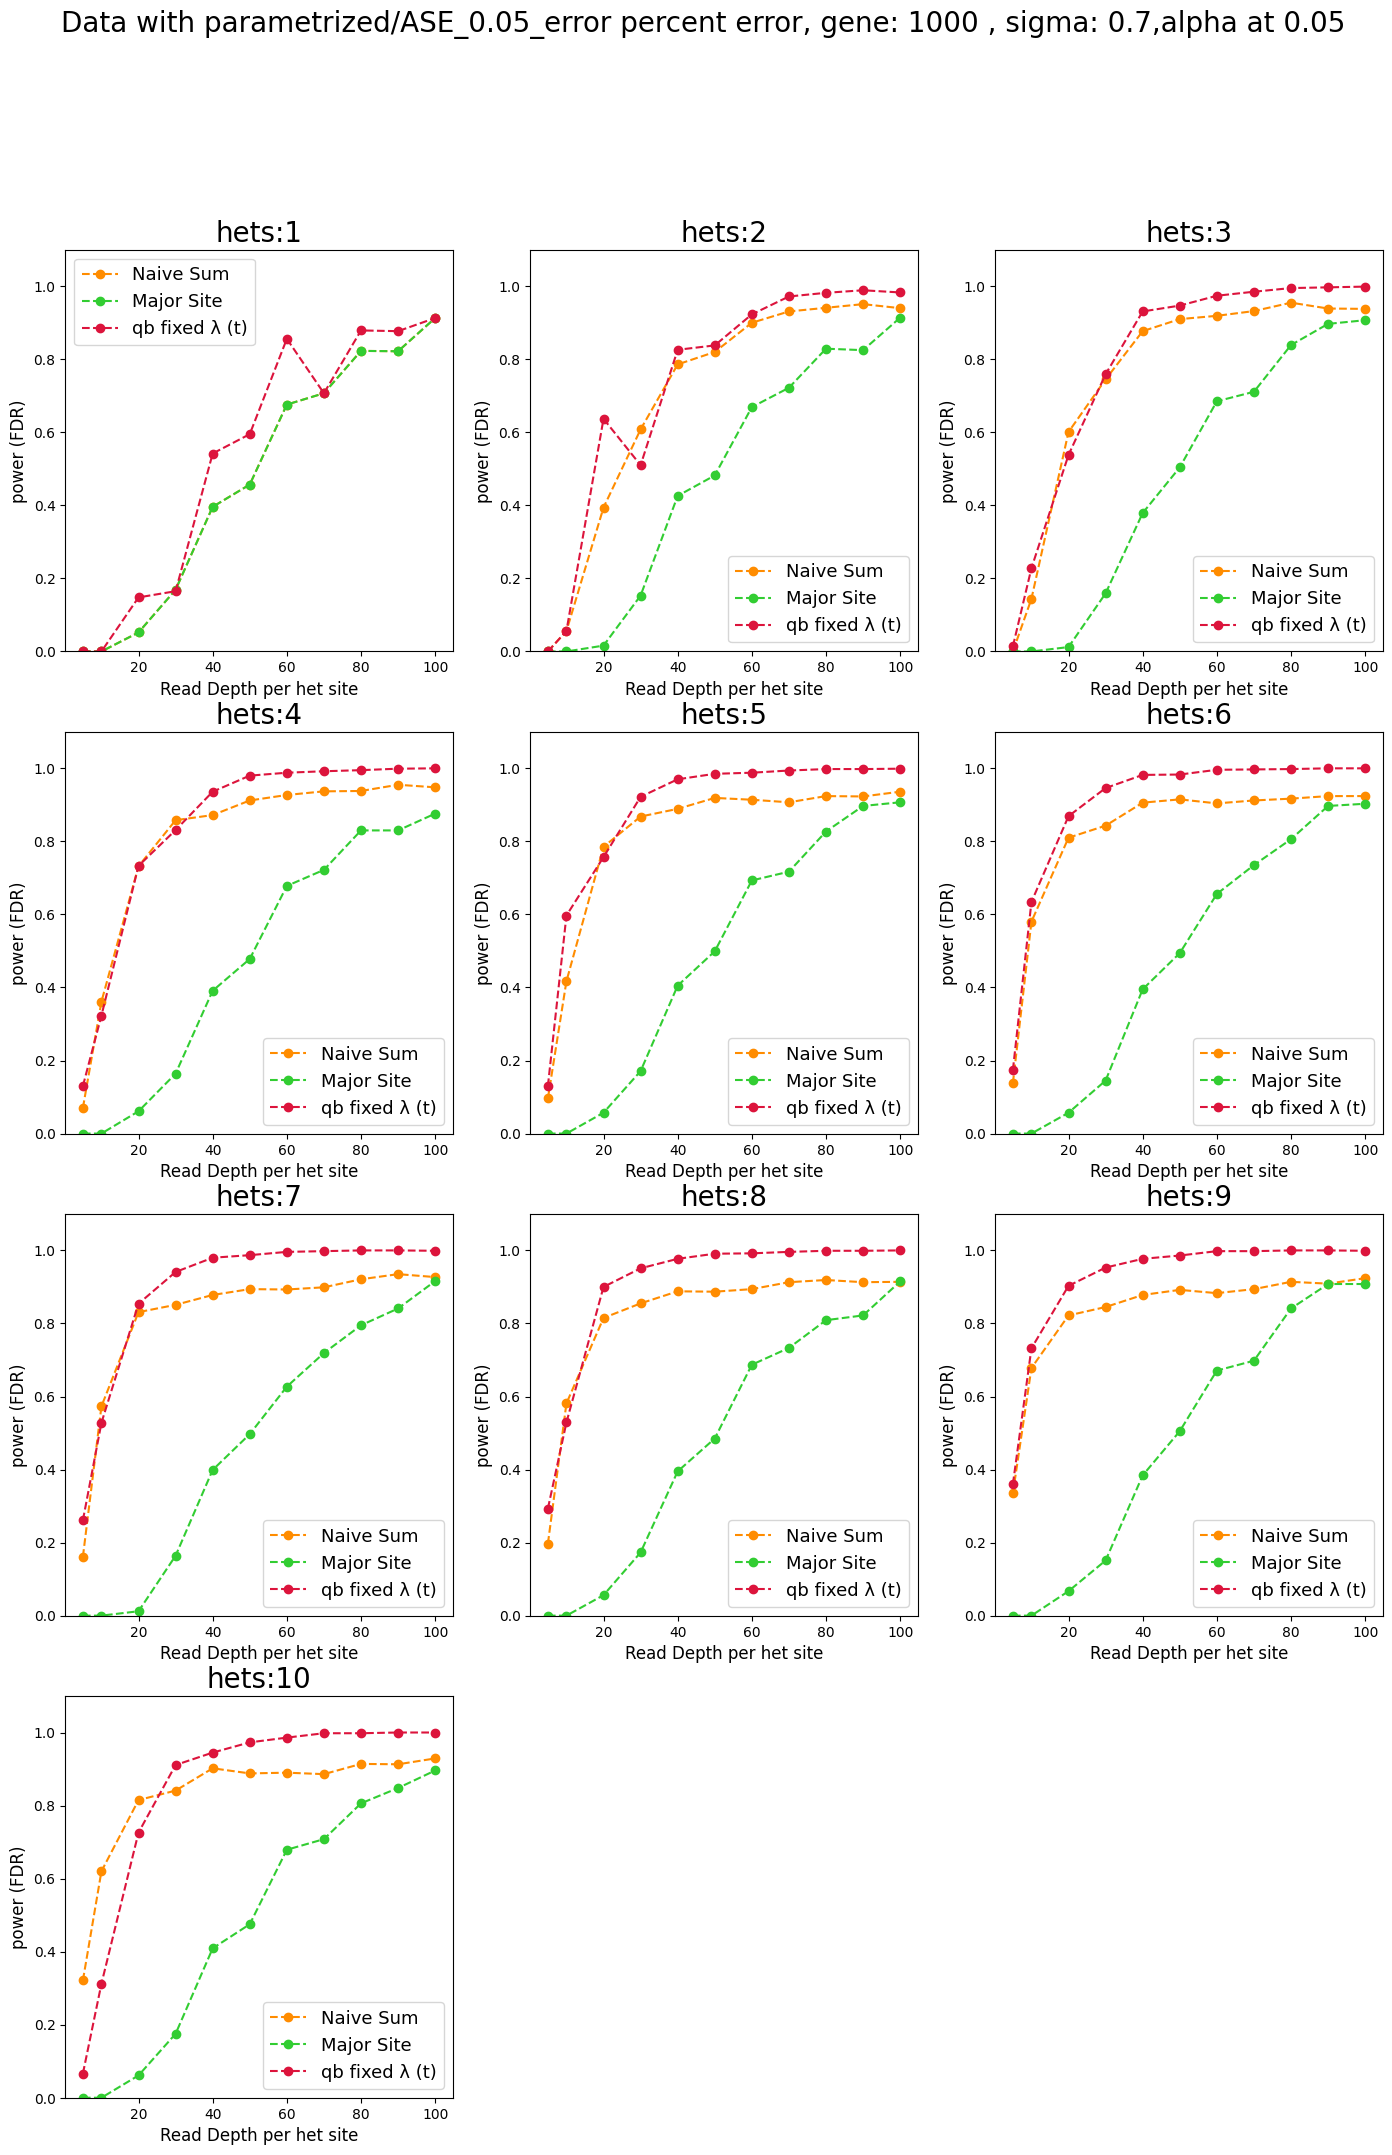

In [10]:
data_path="/data2/stan"
model="BEASTIE3-pi0.05"
workdir="parametrized/ASE_0.05_error"
theta_alt=0.5
gene=1000
sigma=0.7
# list: power, FDR , type1error
list="power"
alpha=0.05

Find_cutoff_from_Null_allmodels(list,model,workdir, theta_alt,alpha,gene=gene,hets=None,depth=None,sigma=sigma,num=3,if_AA=False)

>>>> power calculated using FDR corrected pvalues


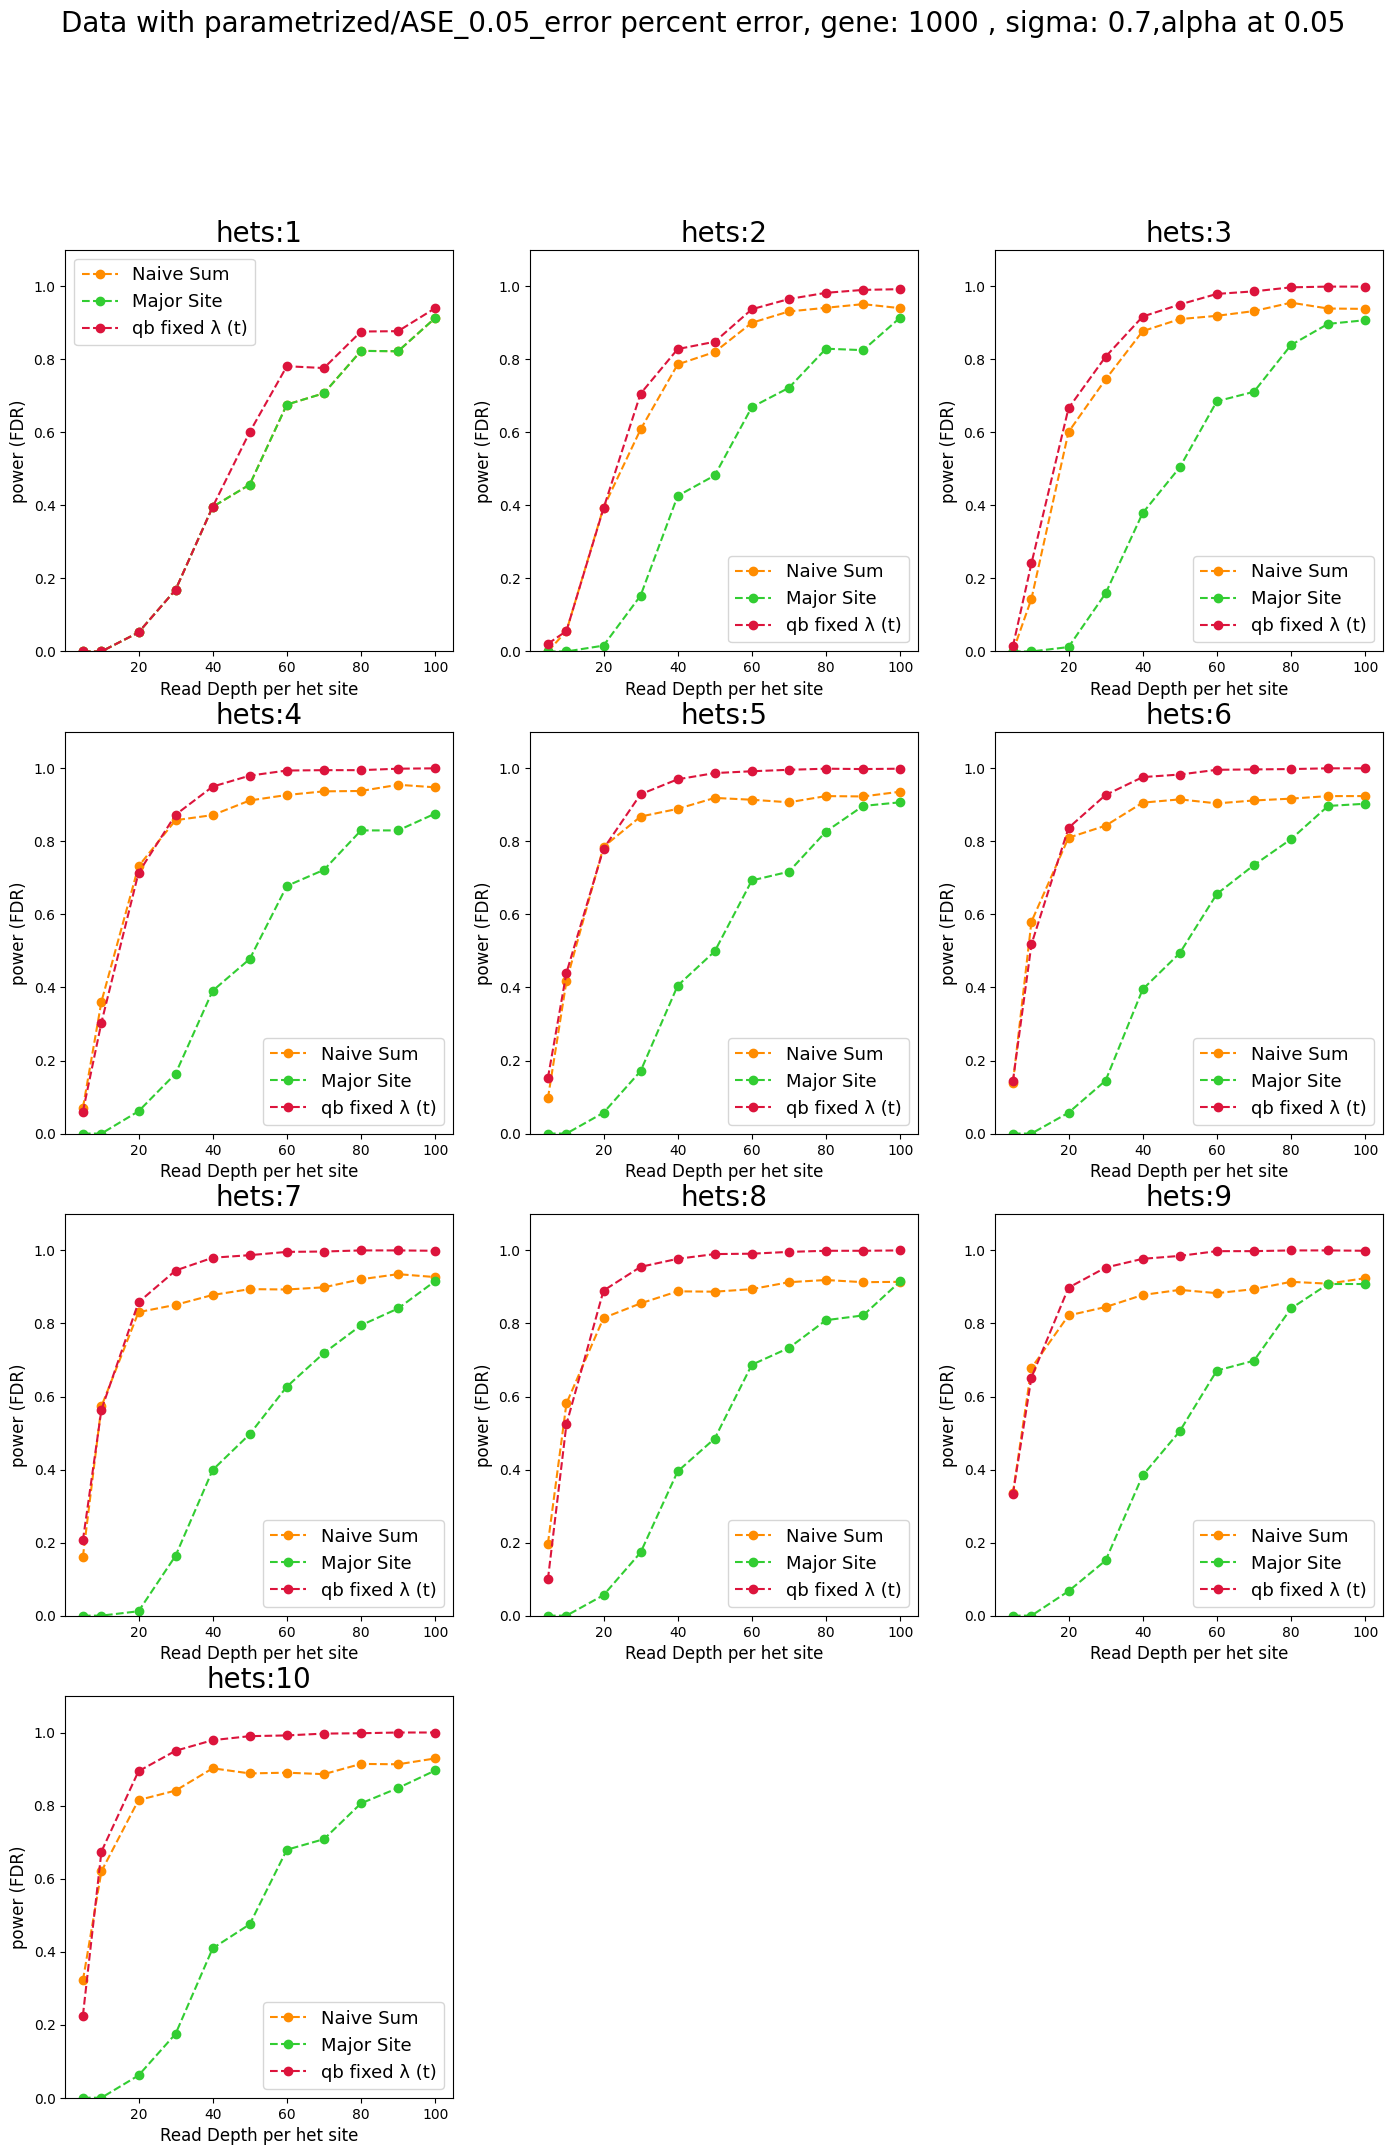

In [7]:
data_path="/data2/stan"
model="BEASTIE3-pi0.05"
workdir="parametrized/ASE_0.05_error"
theta_alt=0.5
gene=1000
sigma=0.7
# list: power, FDR , type1error
list="power"
alpha=0.05

Find_cutoff_from_Null_allmodels(list,model,workdir, theta_alt,alpha,gene=gene,hets=None,depth=None,sigma=sigma,num=3,if_AA=False)

>>>> type1 calculated using FDR corrected pvalues


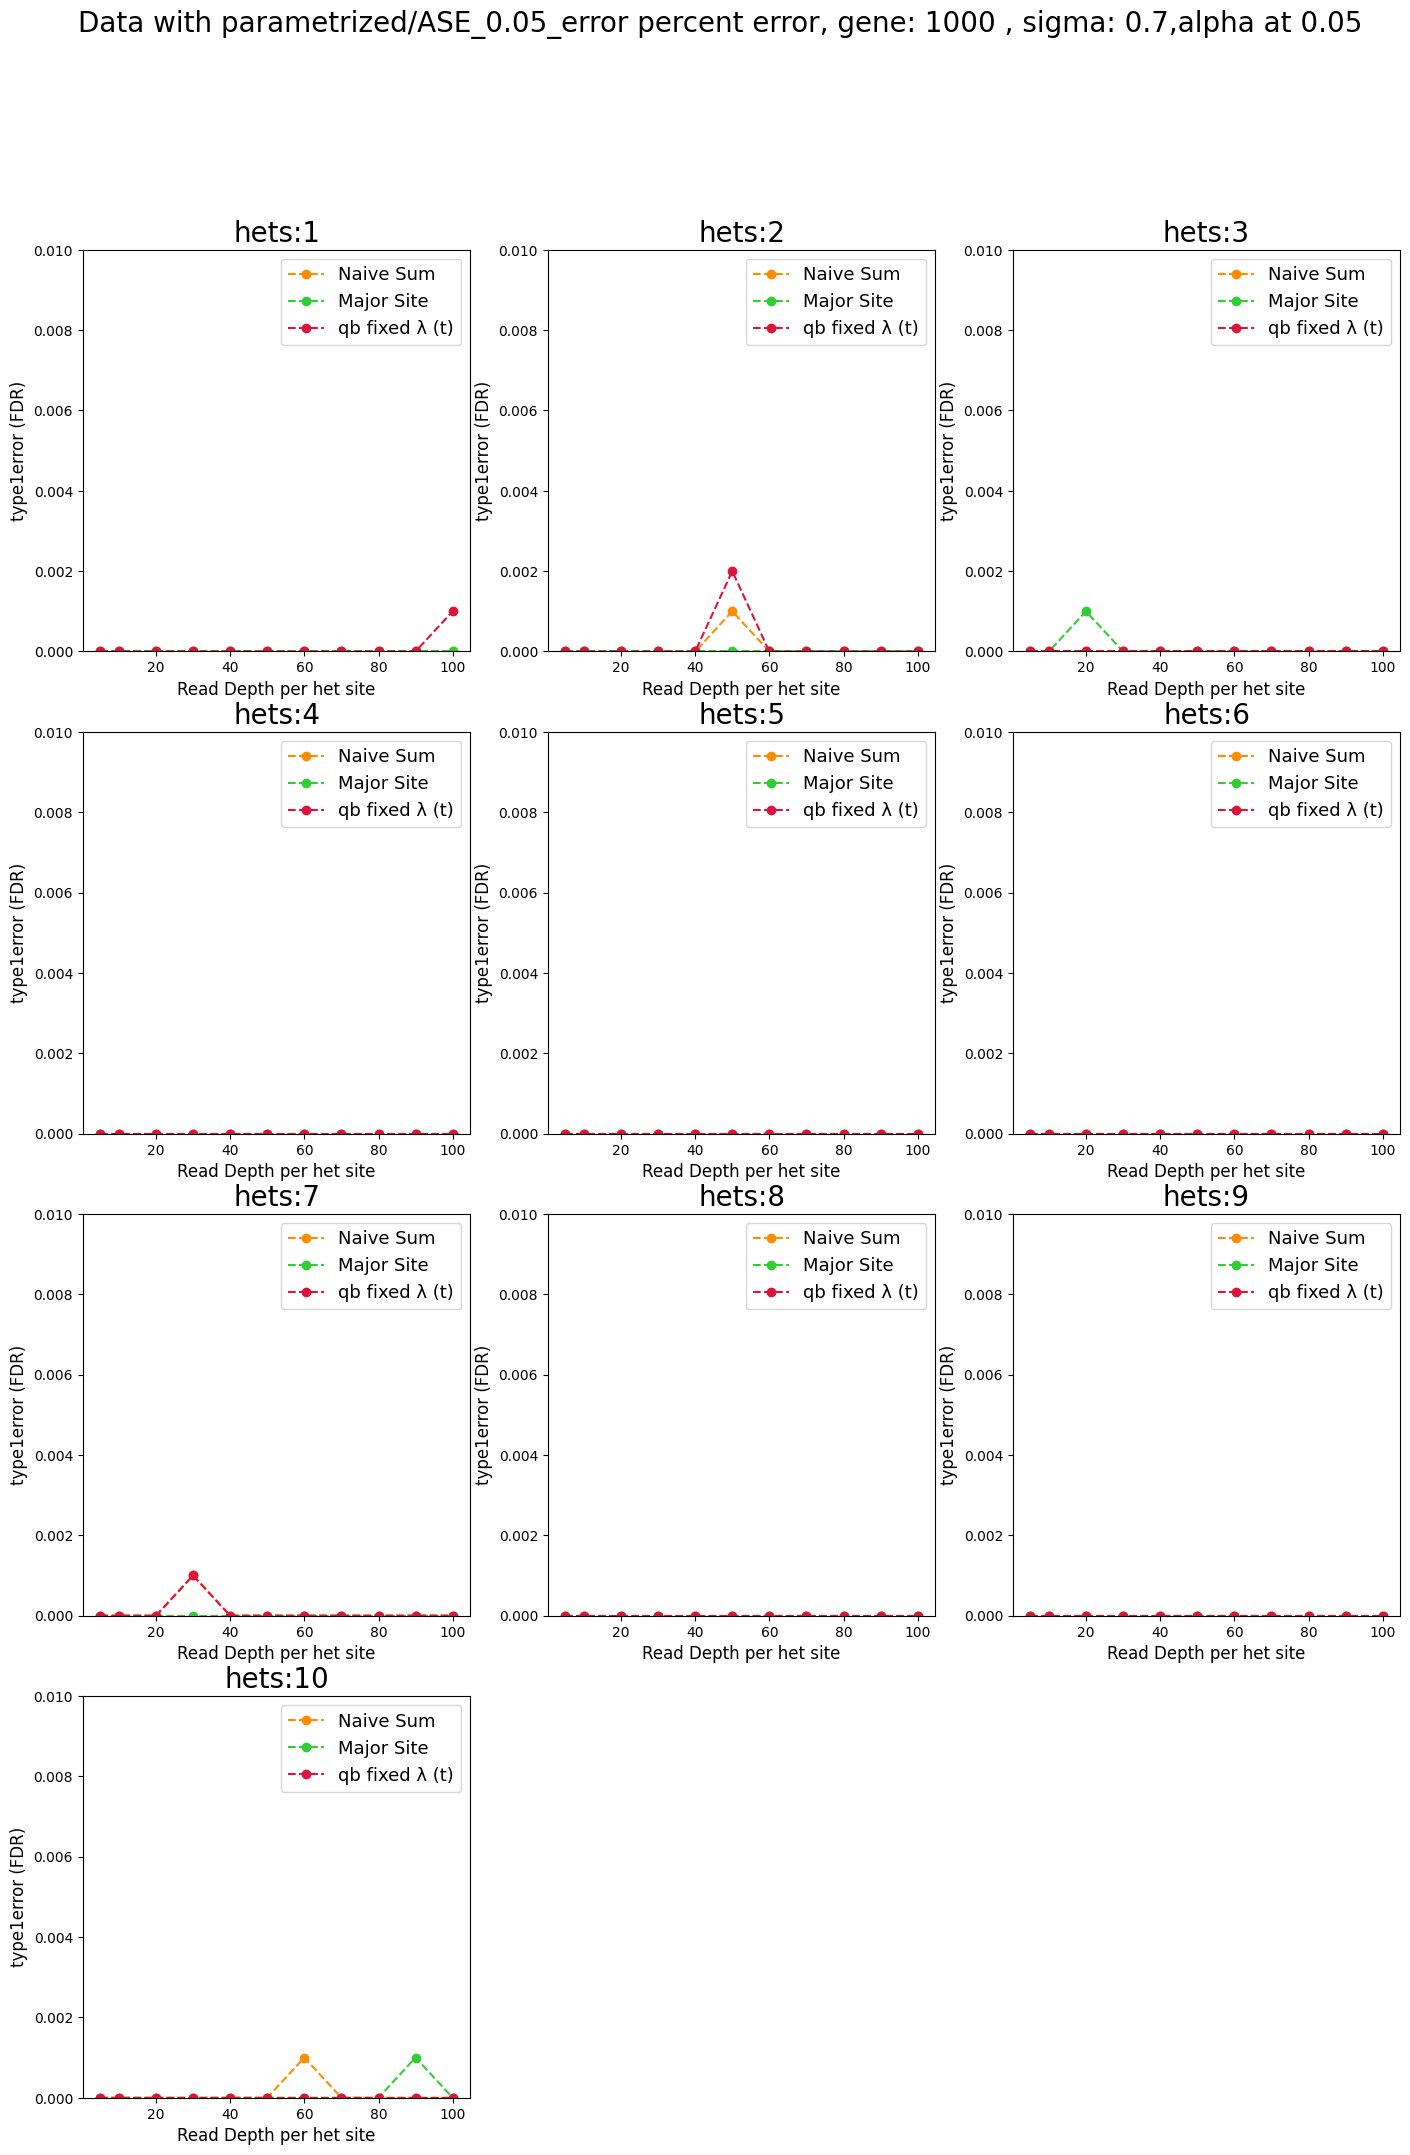

In [13]:
data_path="/data2/stan"
model="BEASTIE3-pi0.05"
workdir="parametrized/ASE_0.05_error"
theta_alt=0.5
gene=1000
sigma=0.7
# list: power, FDR , type1error
list="type1"
cutoff=95
alpha=0.05

Find_cutoff_from_Null_allmodels(list,model,workdir, theta_alt,alpha,gene=gene,hets=None,depth=None,sigma=sigma,num=3,if_AA=False)

>>>> tdr calculated using FDR corrected pvalues


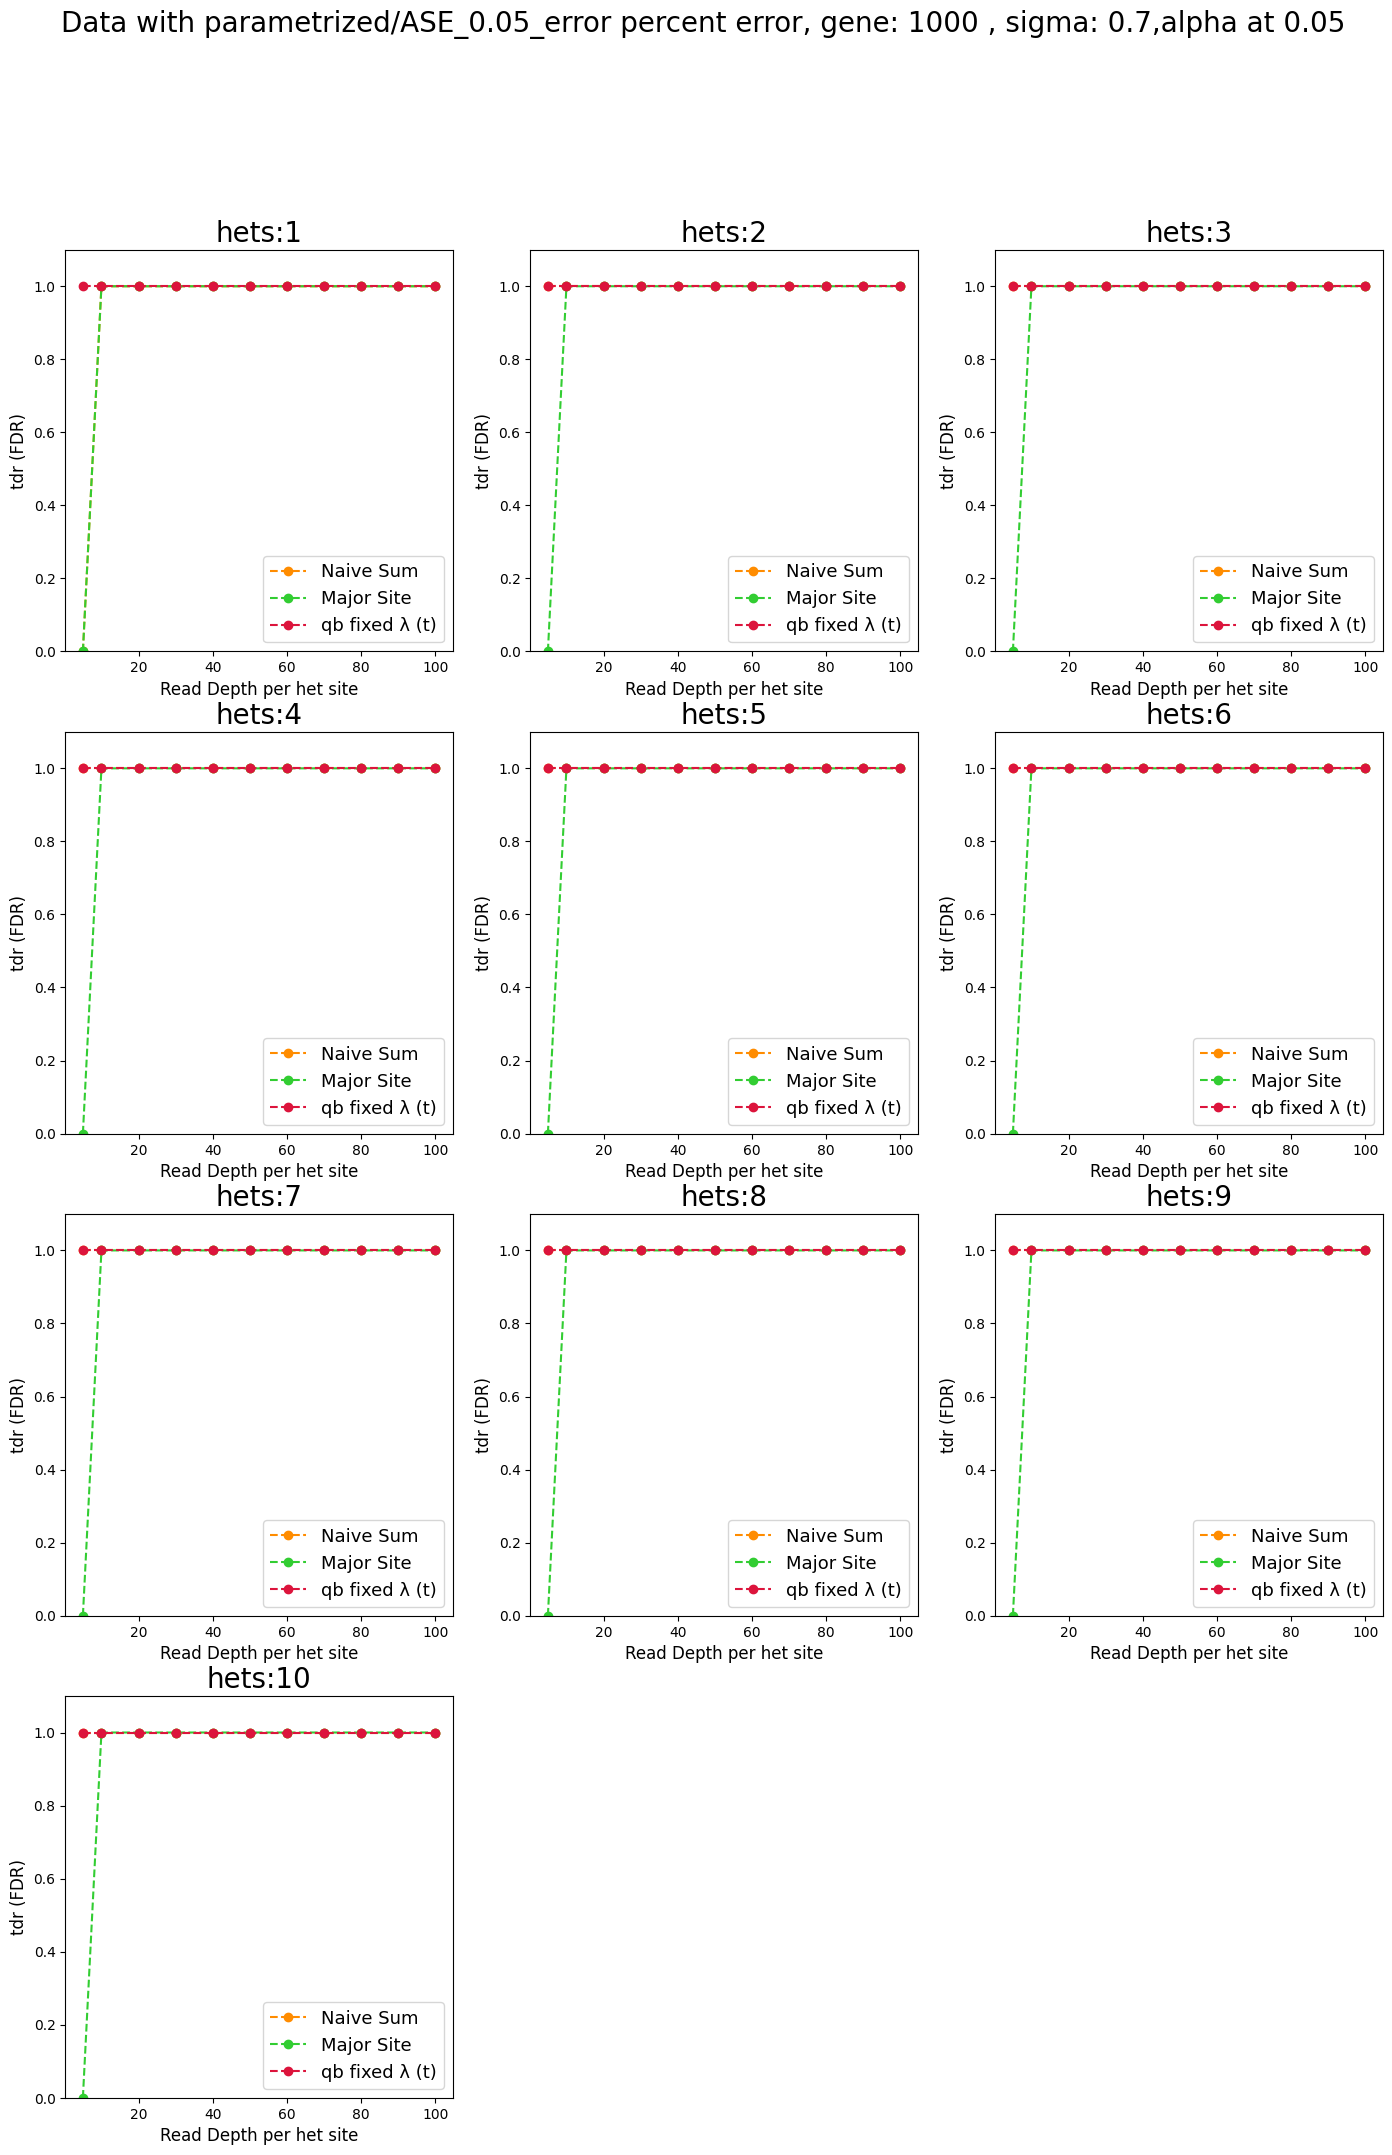

In [11]:
data_path="/data2/stan"
model="BEASTIE3-pi0.05"
workdir="parametrized/ASE_0.05_error"
theta_alt=0.5
gene=1000
sigma=0.7
# list: power, FDR , type1error
list="tdr"
cutoff=95
alpha=0.05

Find_cutoff_from_Null_allmodels(list,model,workdir, theta_alt,alpha,gene=gene,hets=None,depth=None,sigma=sigma,num=3,if_AA=False)

>>>> fdr calculated using FDR corrected pvalues


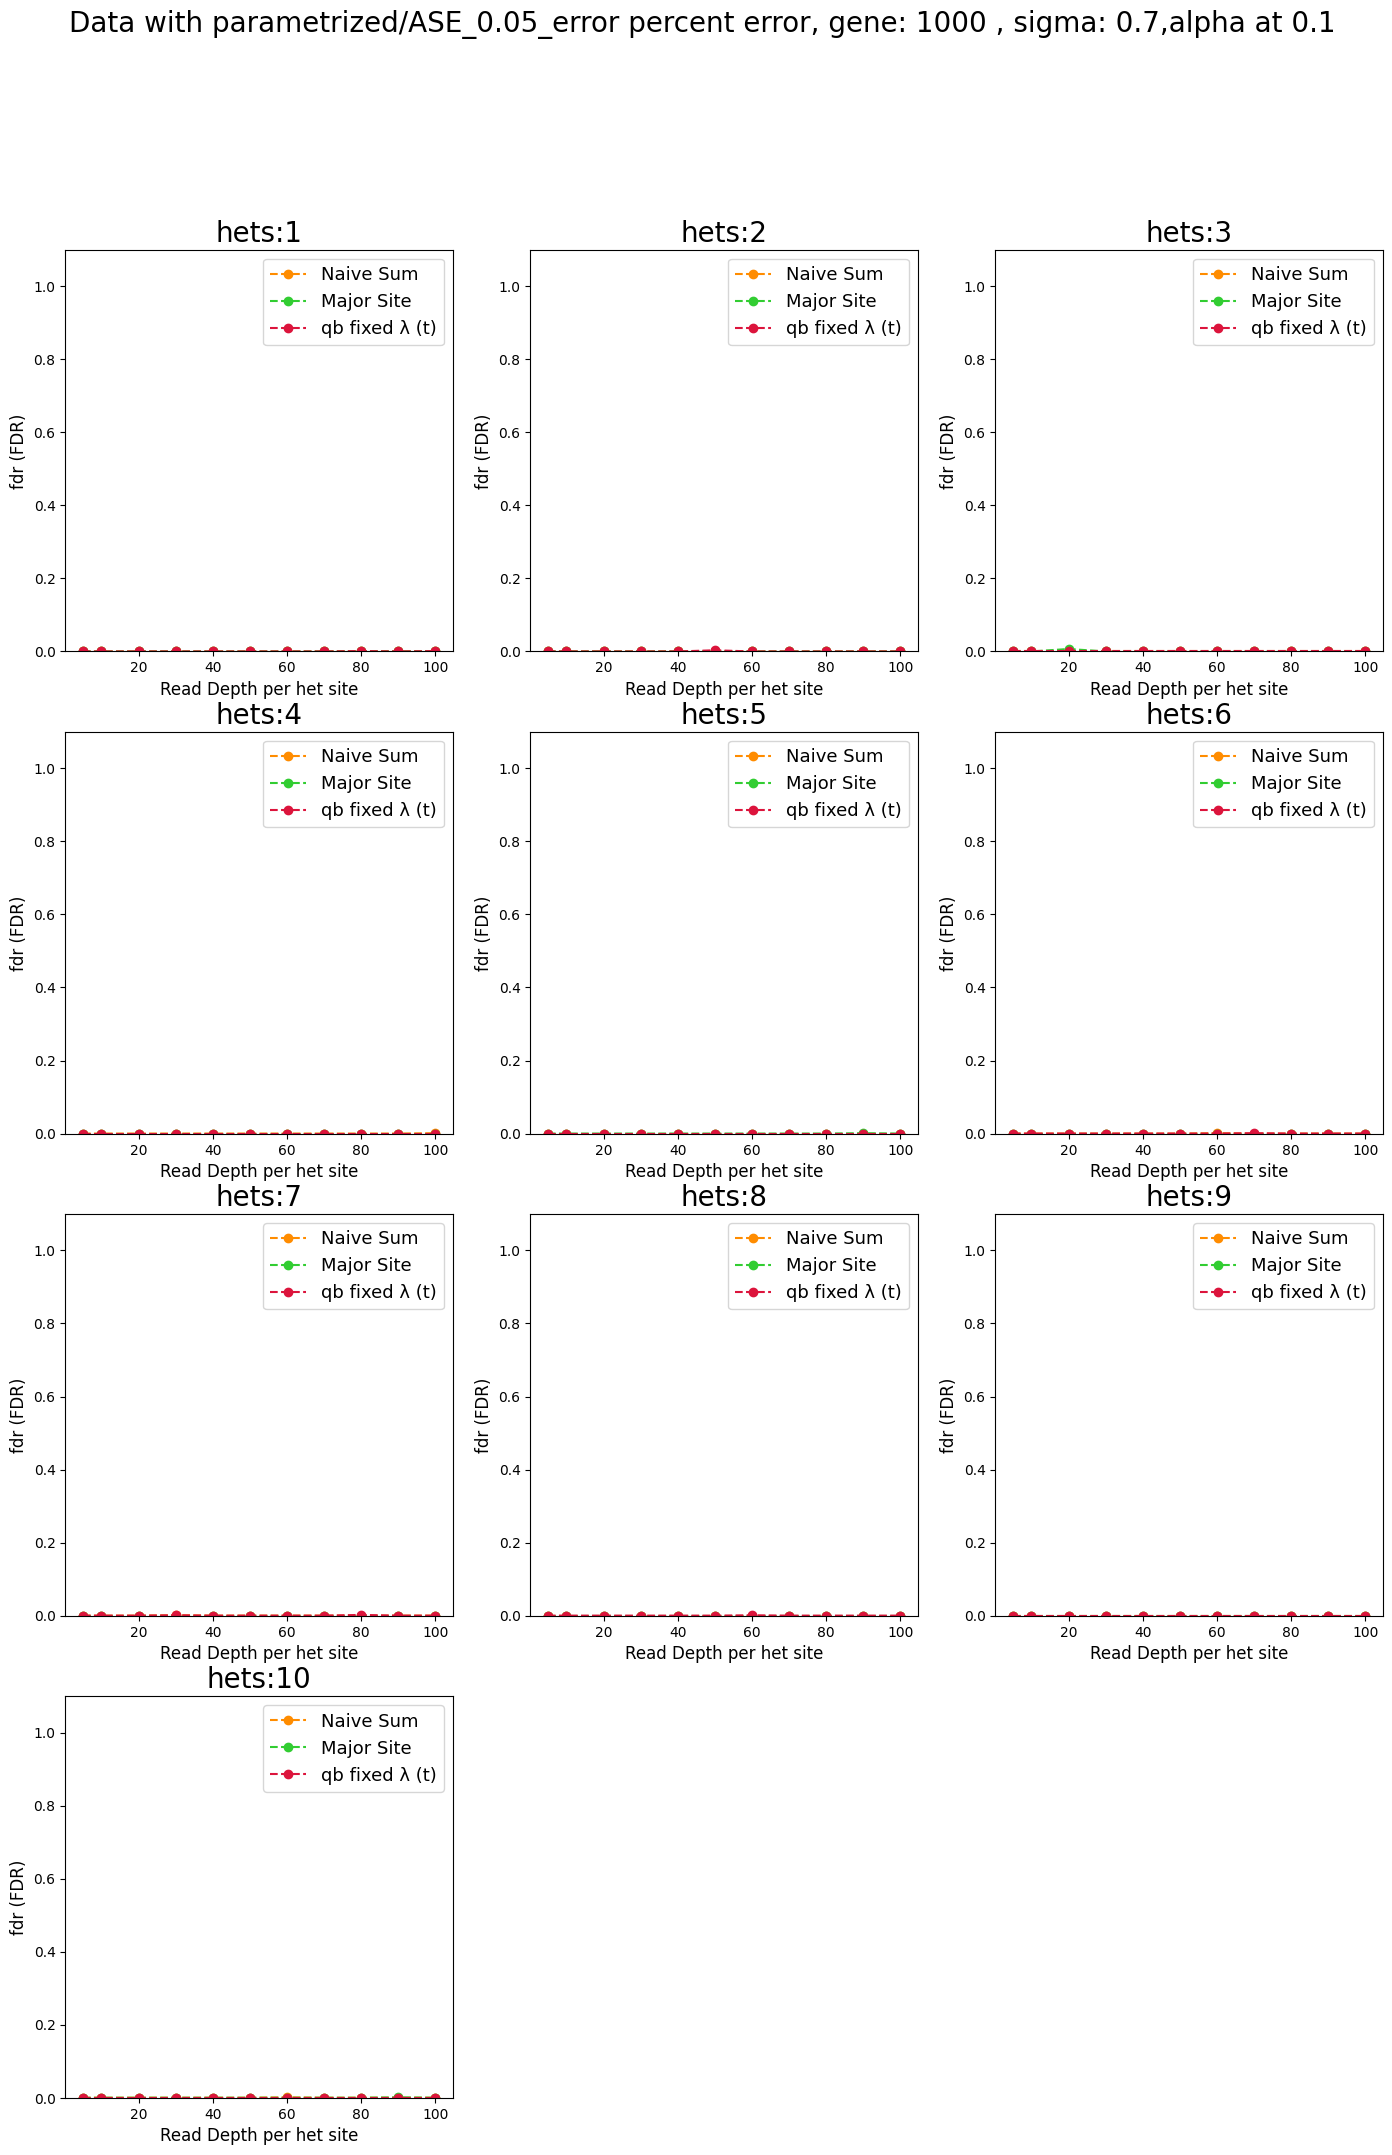

In [17]:
data_path="/data2/stan"
model="BEASTIE3-pi0.05"
workdir="parametrized/ASE_0.05_error"
theta_alt=0.5
gene=1000
sigma=0.7
# list: power, FDR , type1error
list="fdr"
cutoff=95
alpha=0.1

Find_cutoff_from_Null_allmodels(list,model,workdir, theta_alt,alpha,gene=gene,hets=None,depth=None,sigma=sigma,num=3,if_AA=False)

In [ ]:
data_path="/data2/stan"
model="BEASTIE3-pi0.05"
workdir="parametrized/ASE_0.05_error"
theta_alt=0.5
gene=1000
sigma=0.7
# list: power, FDR , type1error
list="fdr"
cutoff=95
alpha=0.05

Find_cutoff_from_Null_allmodels(list,model,workdir, theta_alt,alpha,gene=gene,hets=None,depth=None,sigma=sigma,num=3,if_AA=False)

In [ ]:
data_path="/data2/stan"
model="BEASTIE3-pi0.05"
workdir="parametrized/ASE_0.05_error"
theta_alt=0.5
gene=1000
sigma=0.7
# list: power, FDR , type1error
list="fdr"
cutoff=95
alpha=0.01

Find_cutoff_from_Null_allmodels(list,model,workdir, theta_alt,alpha,gene=gene,hets=None,depth=None,sigma=sigma,num=3,if_AA=False)

>>>> power calculated using FDR corrected pvalues


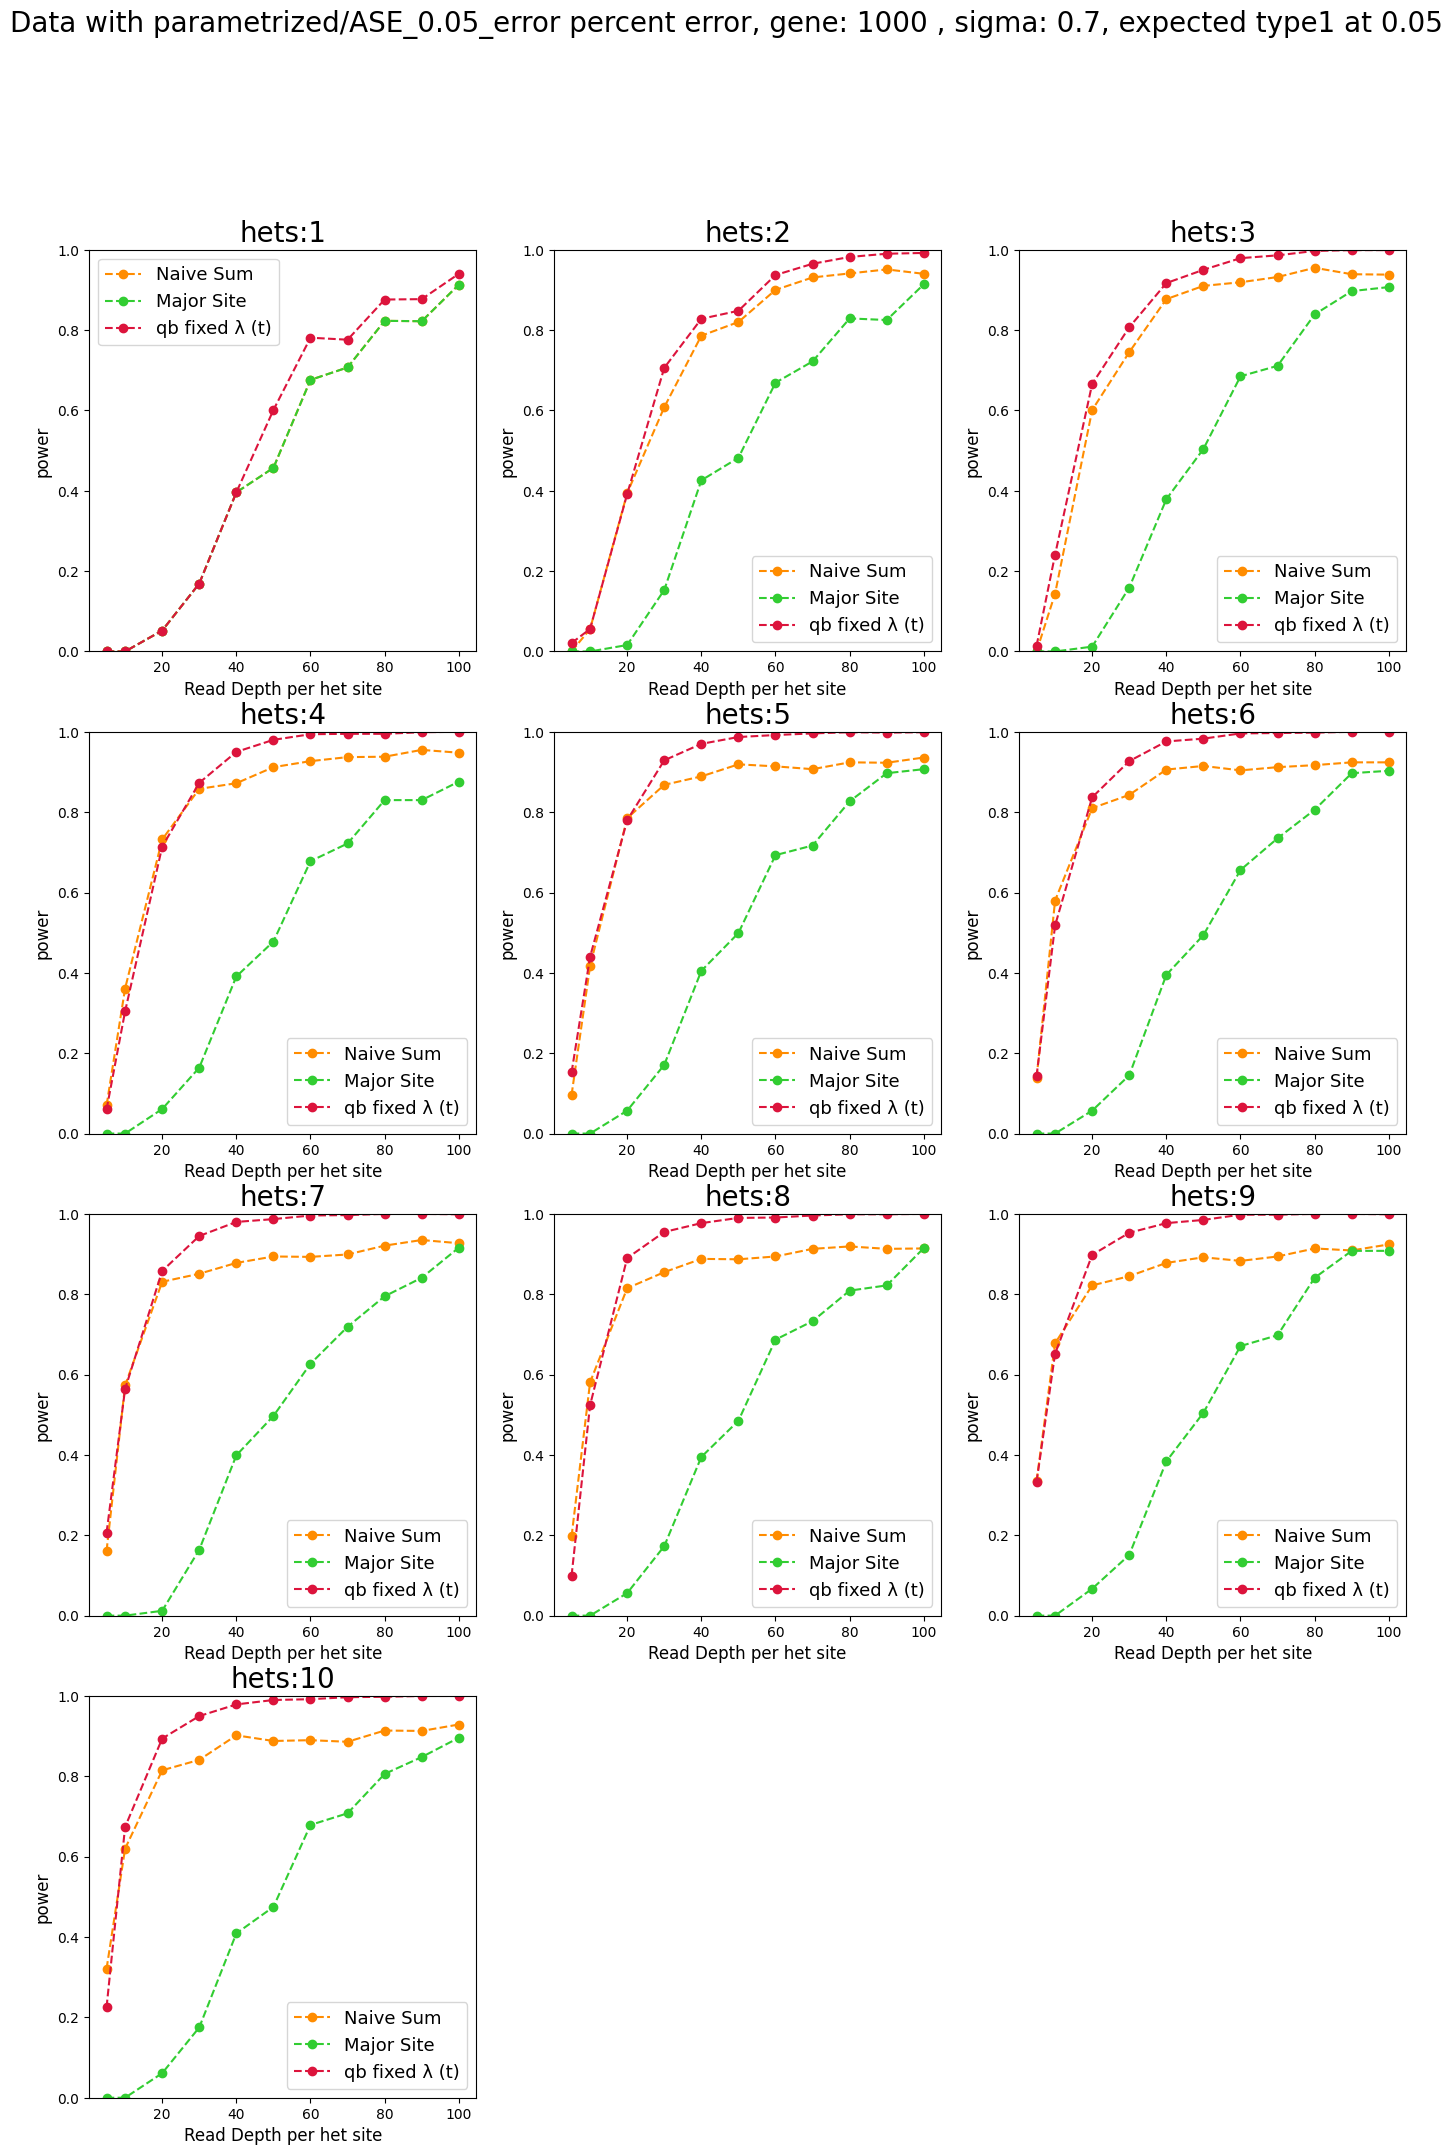

In [ ]:
data_path="/data2/stan"
model="BEASTIE3-pi0.05"
workdir="parametrized/ASE_0.05_error"
theta_alt=0.5
gene=1000
sigma=0.7
# list: power, FDR , type1error
list="power"
cutoff=95
alpha=0.05

Find_cutoff_from_Null_allmodels(list,model,workdir, theta_alt,cutoff,alpha,gene=gene,hets=None,depth=None,sigma=sigma,num=3,if_AA=False)

>>>> type1 calculated using FDR corrected pvalues


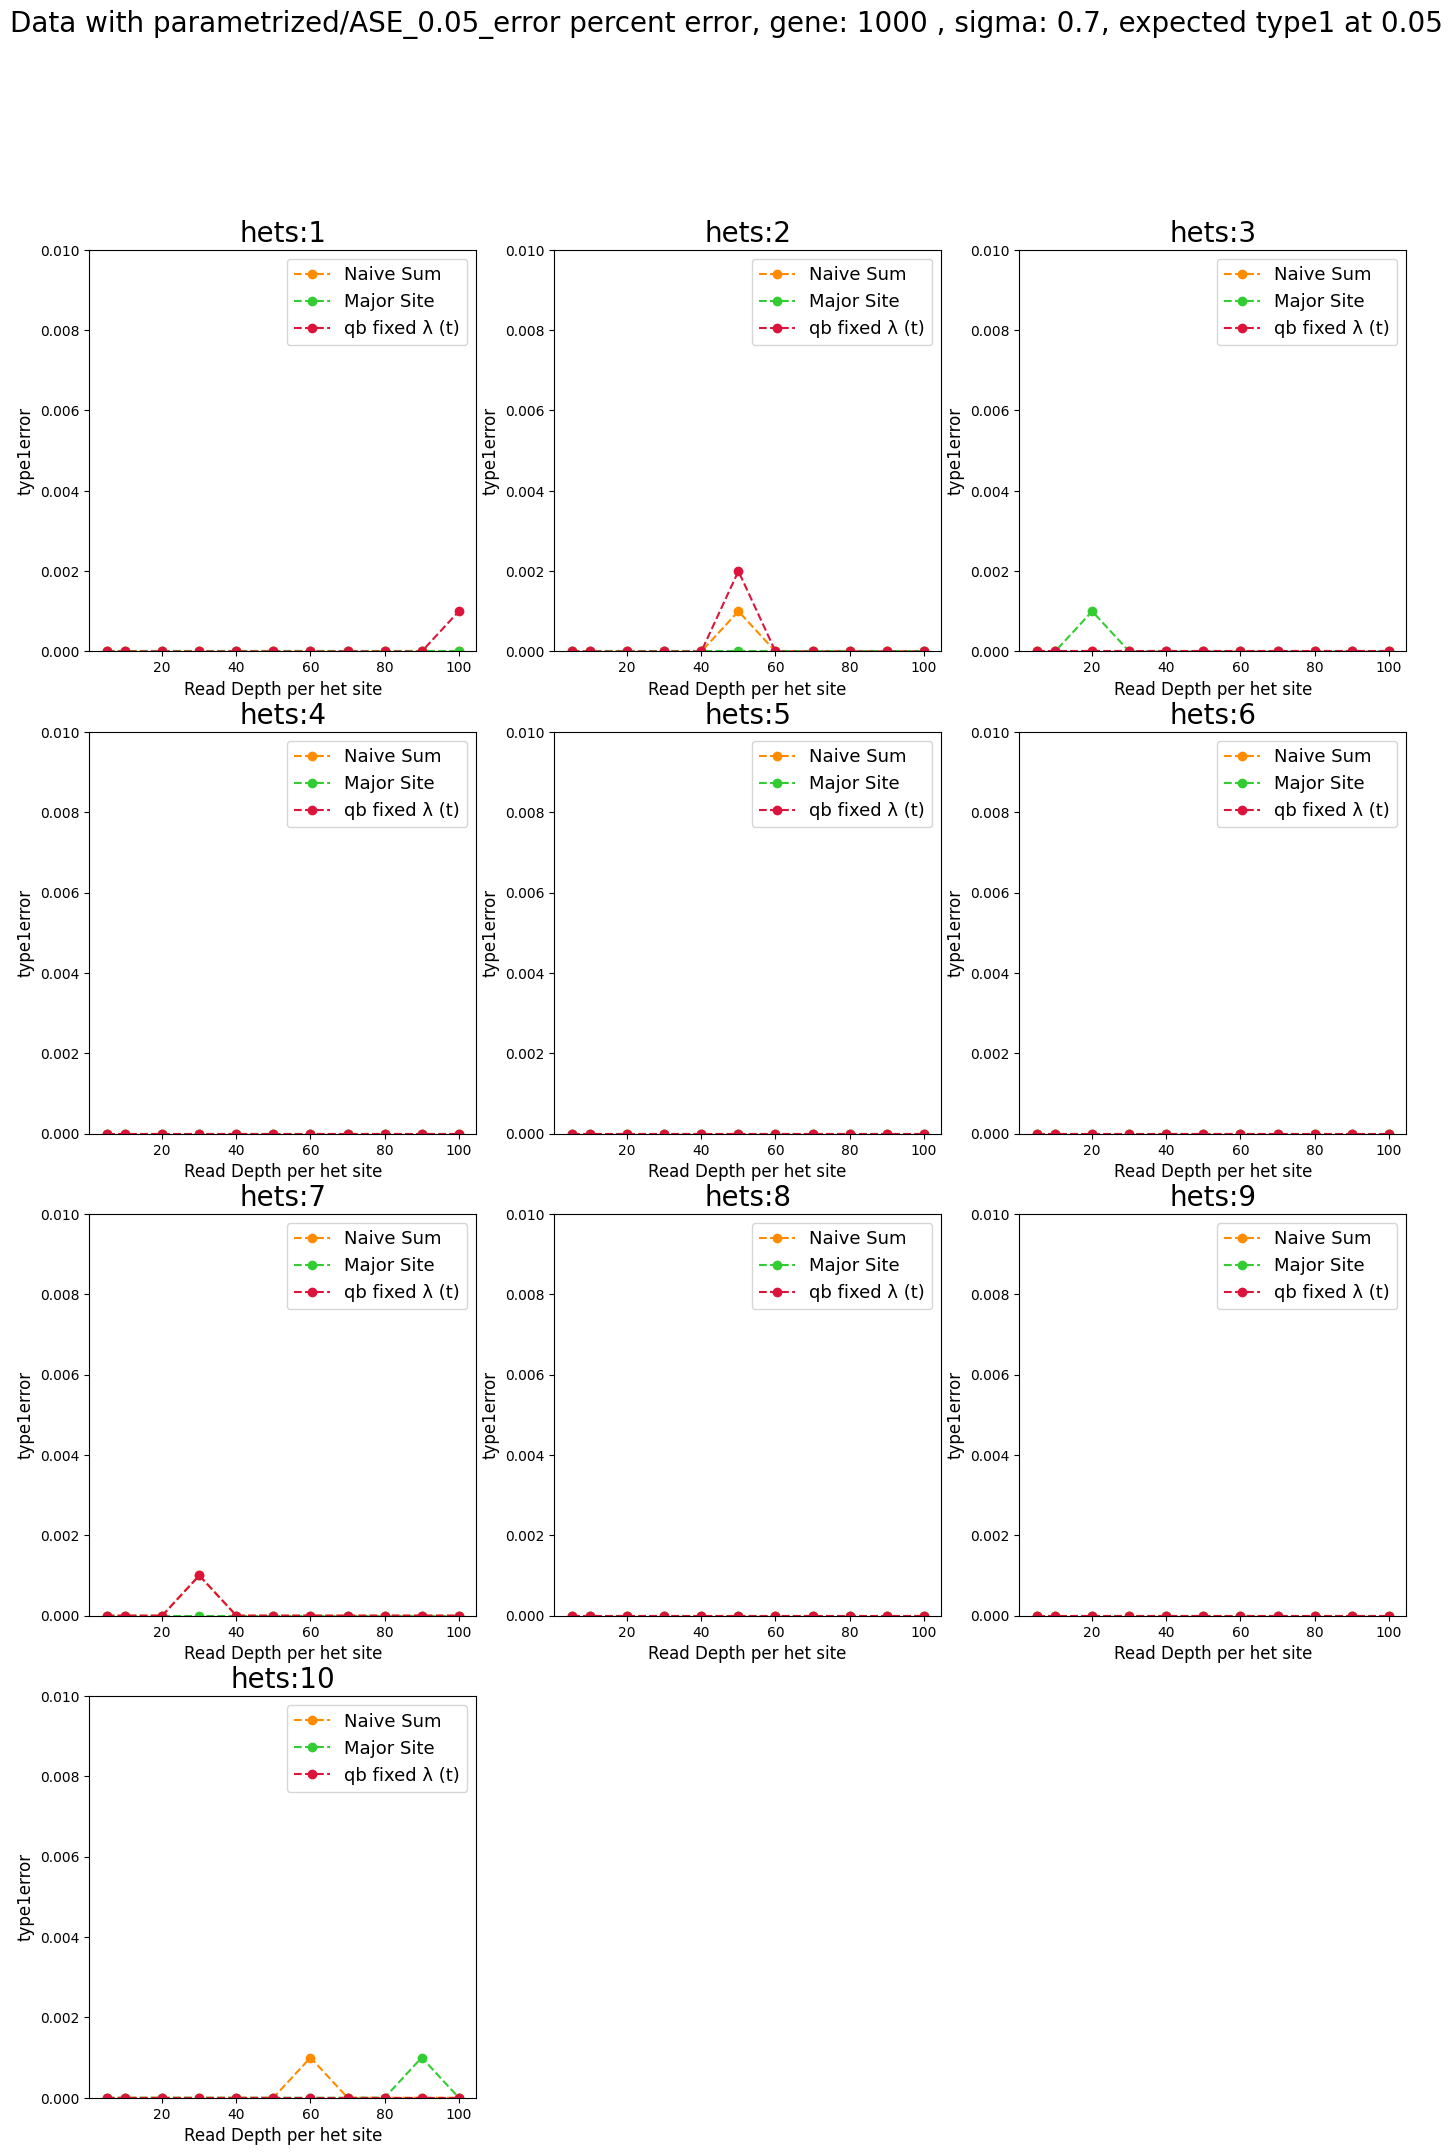

In [27]:
data_path="/data2/stan"
model="BEASTIE3-pi0.05"
workdir="parametrized/ASE_0.05_error"
theta_alt=0.5
gene=1000
sigma=0.7
list="type1"
cutoff=95
alpha=0.05
Find_cutoff_from_Null_allmodels(list,model,workdir, theta_alt,cutoff,alpha,gene=gene,hets=None,depth=None,sigma=sigma,num=3,if_AA=False)